## 範例重點
### 學習在模型開始前檢查各個環節
1. 是否有 GPU 資源
2. 將前處理轉為函式，統一處理訓練、驗證與測試集
3. 將超參數變數化，易於重複使用函式、模型等

In [ ]:
## 確認硬體資源 (如果你是在 Linux, 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
!nvidia-smi

Sat Jun 26 15:26:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
import os
from tensorflow import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [23]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [29]:
## 資料前處理

from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler( feature_range=(-1,1) ) # 設定縮放的區間上下限
def preproc_x(x, flatten=True):

  
    #x = x / 255.
    if flatten:
        MinMax_Data = Scaler.fit_transform( x.reshape((len(x), -1)) ) # Data 為原始資料
       # x = x.reshape((len(x), -1))
    return MinMax_Data

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [27]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [28]:
x_train

array([[-0.5372549 , -0.51372549, -0.50588235, ..., -0.03529412,
        -0.27843137, -0.43529412],
       [ 0.20784314,  0.38823529,  0.46666667, ...,  0.12156863,
         0.04313725,  0.12941176],
       [ 1.        ,  1.        ,  1.        , ..., -0.37254902,
        -0.3254902 , -0.34117647],
       ...,
       [-0.7254902 ,  0.39607843,  0.84313725, ..., -0.90588235,
        -0.75686275, -0.60784314],
       [ 0.48235294,  0.65490196,  0.88235294, ...,  0.52941176,
         0.49019608,  0.34117647],
       [ 0.79607843,  0.79607843,  0.8745098 , ...,  0.27843137,
         0.27843137,  0.2627451 ]])

In [7]:
for i,n in enumerate([512, 256, 128]):
    
    print(f" i={i}")
    print(f" n={n}")

 i=0
 n=512
 i=1
 n=256
 i=2
 n=128


In [30]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128,64,32,16]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [31]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 16)                528       
__________

In [32]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 30
BATCH_SIZE = 256

In [34]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [35]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 12s 231us/sample - loss: 1.8377 - acc: 0.3445 - val_loss: 1.6213 - val_acc: 0.4290
Epoch 2/30
50000/50000 [==============================] - 11s 211us/sample - loss: 1.5493 - acc: 0.4545 - val_loss: 1.4645 - val_acc: 0.4808
Epoch 3/30
50000/50000 [==============================] - 11s 211us/sample - loss: 1.4130 - acc: 0.5020 - val_loss: 1.4284 - val_acc: 0.4942
Epoch 4/30
50000/50000 [==============================] - 11s 212us/sample - loss: 1.3130 - acc: 0.5370 - val_loss: 1.4042 - val_acc: 0.5110
Epoch 5/30
50000/50000 [==============================] - 11s 220us/sample - loss: 1.2282 - acc: 0.5680 - val_loss: 1.3664 - val_acc: 0.5214
Epoch 6/30
50000/50000 [==============================] - 11s 218us/sample - loss: 1.1486 - acc: 0.5963 - val_loss: 1.3533 - val_acc: 0.5319
Epoch 7/30
50000/50000 [==============================] - 11s 219us/sample - loss: 1.0786 - acc: 0.6211 

In [40]:
model.history.history

{'loss': [1.8376884930801392,
  1.5492784060287477,
  1.4129870165252685,
  1.3129733366012573,
  1.2282340705108643,
  1.1485670071792602,
  1.0786067679595948,
  1.0095831298446656,
  0.9368127206039428,
  0.8691420589828491,
  0.8017549189758301,
  0.7494465057754517,
  0.6790631823921204,
  0.6266261959457398,
  0.568695944404602,
  0.5202340013504029,
  0.4750568610191345,
  0.4337674311828613,
  0.40821294275283815,
  0.3766904307746887,
  0.3486737483215332,
  0.3380915927314758,
  0.30537646591186524,
  0.2816757437038422,
  0.2653279392528534,
  0.2508553344154358,
  0.23801753756523134,
  0.22771027551651002,
  0.20548296308517455,
  0.2095740466403961],
 'acc': [0.3445,
  0.45446,
  0.50202,
  0.537,
  0.56798,
  0.59626,
  0.62114,
  0.64364,
  0.6684,
  0.69174,
  0.71558,
  0.73456,
  0.75938,
  0.77854,
  0.79732,
  0.81486,
  0.8326,
  0.8469,
  0.85574,
  0.86754,
  0.87698,
  0.88152,
  0.89378,
  0.90172,
  0.90782,
  0.91304,
  0.91744,
  0.91992,
  0.92914,
  0.927

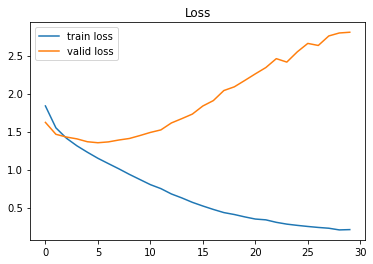

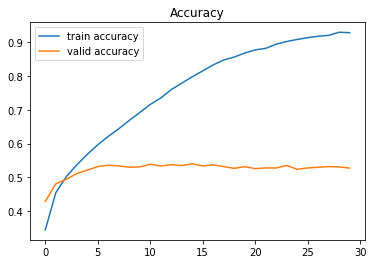

In [41]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (可善用 google colab)，比較使用 CPU 與 GPU 的訓練速度